In [ ]:
import numpy as np
import pandas as pd

import tensorflow_datasets as tfds
import tensorflow as tf

In [67]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
f1 = pd.DataFrame(columns=["msg","class"])

In [ ]:
i = 10
with open("/content/SMSSpamCollection.txt", "r") as file:
    for line in file:
        # dict= {"class":(line[:4].strip()) , "msg":(line[4:].strip())}
        f1.loc[len(f1.index)] = [(line[4:].strip()) , (line[:4].strip()) ]

In [20]:
f1["class"]= f1["class"].map({"ham":1,"spam":0})

In [21]:
f1.sample(7)

,msg,class
3472,Heart is empty without love.. Mind is empty wi...,1
2850,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...,0
4951,Hi its me you are probably having too much fun...,1
1418,No wonder... Cos i dun rem seeing a silver car...,1
4281,WINNER!! As a valued network customer you have...,0
469,"Yup, no need. I'll jus wait 4 e rain 2 stop.",1
809,I am taking half day leave bec i am not well,1


In [38]:
dataset = tf.data.Dataset.from_tensor_slices((f1['msg'].values, f1['class'].values))

In [39]:
dataset_size = len(dataset)

# Define the size of the training and testing subsets
train_size = int(0.8 * dataset_size)

In [40]:
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [41]:
for i,j in test_dataset:
    print(i.numpy(),j.numpy(),sep="\n")
    break

b'Die... I accidentally deleted e msg i suppose 2 put in e sim archive. Haiz... I so sad...'
1


In [42]:
train_dataset = train_dataset.shuffle(400).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(64).prefetch(tf.data.AUTOTUNE)

In [48]:
# VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens = 600)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [49]:
encoder(i)[:].numpy()

array([  1,   3,   1,   1, 160, 154,   3,   1,  23, 403,  10, 160,   1,
         1,   1,   3,  27, 552])

# FEED-FORWARD NETWORKS WITH EMBEDDINGS (with LSTM) (Model D)

In [61]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),output_dim=64,
        mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

In [59]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [60]:
history = model.fit(
    train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
70/70 [==============================] - ETA: 0s - loss: 0.6725 - accuracy: 0.1350

70/70 [==============================] - 11s 95ms/step - loss: 0.6725 - accuracy: 0.1350 - val_loss: 0.6379 - val_accuracy: 0.1300
Epoch 2/10
70/70 [==============================] - 4s 53ms/step - loss: 0.5724 - accuracy: 0.3779
Epoch 3/10
70/70 [==============================] - 5s 67ms/step - loss: 0.4717 - accuracy: 0.7226
Epoch 4/10
70/70 [==============================] - 4s 52ms/step - loss: 0.3313 - accuracy: 0.8677
Epoch 5/10
70/70 [==============================] - 4s 59ms/step - loss: 0.2342 - accuracy: 0.9262
Epoch 6/10
70/70 [==============================] - 5s 74ms/step - loss: 0.1824 - accuracy: 0.9491
Epoch 7/10
70/70 [==============================] - 5s 68ms/step - loss: 0.1627 - accuracy: 0.9504
Epoch 8/10
70/70 [==============================] - 4s 52ms/step - loss: 0.1509 - accuracy: 0.9608
Epoch 9/10
70/70 [==============================] - 4s 61ms/step - loss: 0.1306 - accuracy: 0.9648
Epoch 10/10
70/70 [==============================] - 4s 55ms/step - loss: 0.1

In [65]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

18/18 [==============================] - 0s 9ms/step - loss: 0.1335 - accuracy: 0.9596
Test Loss: 0.13352084159851074
Test Accuracy: 0.9596412777900696


(0.0, 0.6335913058370352)

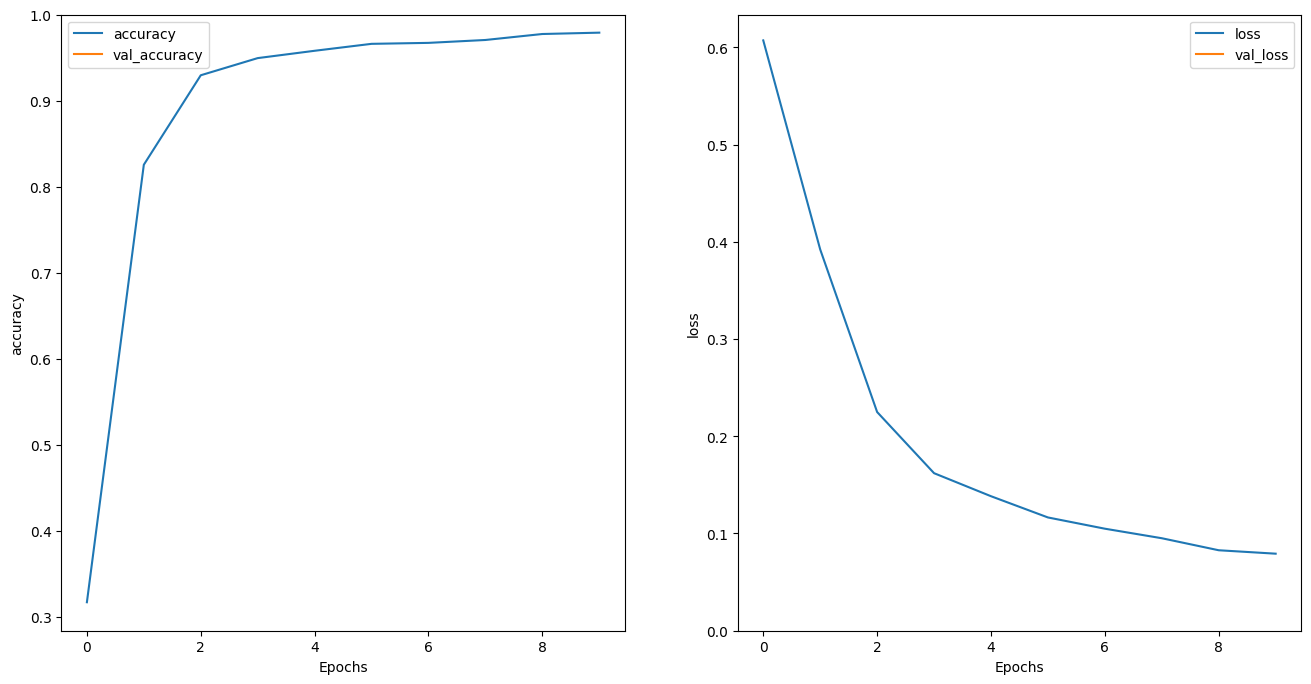

In [68]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

<H3> LSTM in this feed-forward network is particularly beneficial for sequence prediction tasks, as it can capture long-term dependencies and remember contextual information from previous time steps</H3>

# # FEED-FORWARD NETWORKS WITH EMBEDDINGS (with SimpleRNN) (Model C)

In [62]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),output_dim=64,
        mask_zero=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(1)
])

In [63]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [64]:
history = model.fit(
    train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
70/70 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.3167

70/70 [==============================] - 5s 42ms/step - loss: 0.6072 - accuracy: 0.3167 - val_loss: 0.4997 - val_accuracy: 0.6870
Epoch 2/10
70/70 [==============================] - 2s 28ms/step - loss: 0.3922 - accuracy: 0.8255
Epoch 3/10
70/70 [==============================] - 2s 27ms/step - loss: 0.2249 - accuracy: 0.9296
Epoch 4/10
70/70 [==============================] - 2s 28ms/step - loss: 0.1620 - accuracy: 0.9495
Epoch 5/10
70/70 [==============================] - 2s 27ms/step - loss: 0.1383 - accuracy: 0.9581
Epoch 6/10
70/70 [==============================] - 3s 38ms/step - loss: 0.1165 - accuracy: 0.9661
Epoch 7/10
70/70 [==============================] - 2s 26ms/step - loss: 0.1049 - accuracy: 0.9673
Epoch 8/10
70/70 [==============================] - 2s 25ms/step - loss: 0.0951 - accuracy: 0.9706
Epoch 9/10
70/70 [==============================] - 2s 28ms/step - loss: 0.0828 - accuracy: 0.9776
Epoch 10/10
70/70 [==============================] - 3s 46ms/step - loss: 0.07

In [69]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

18/18 [==============================] - 0s 9ms/step - loss: 0.1335 - accuracy: 0.9596
Test Loss: 0.13352084159851074
Test Accuracy: 0.9596412777900696


(0.0, 0.6335913058370352)

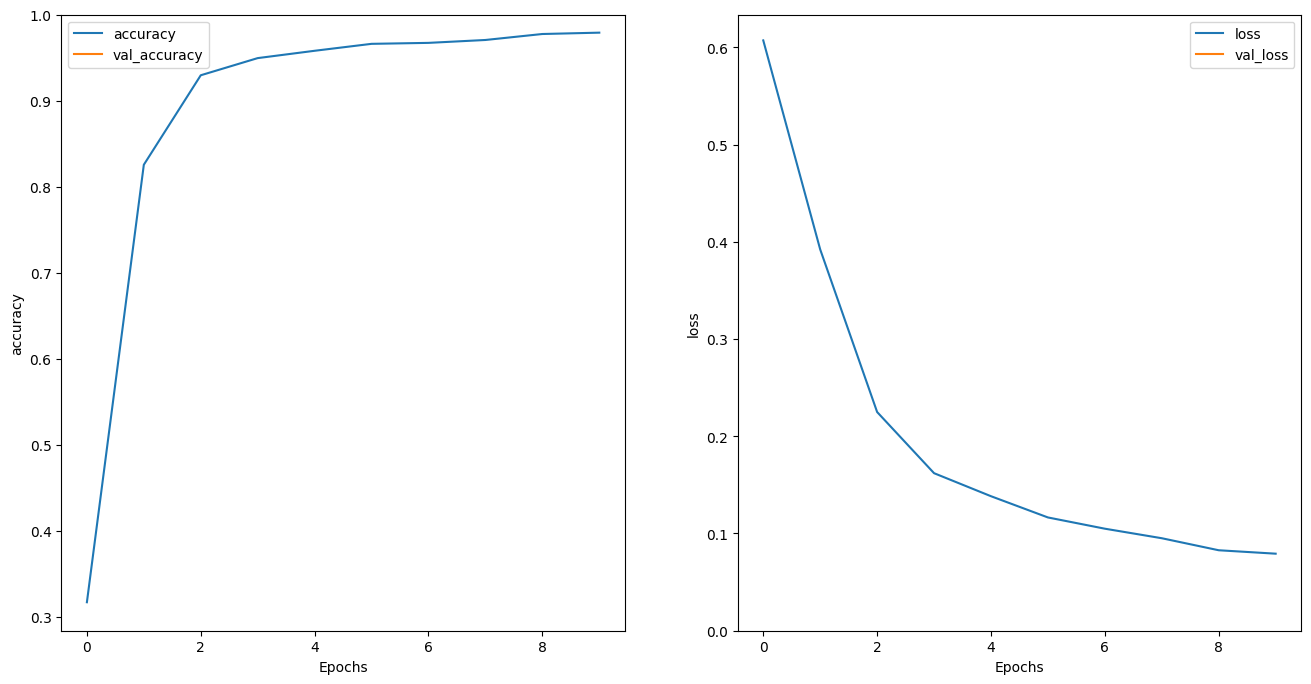

In [70]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

<H3>Feed-Forward Networks with Embeddings (with SimpleRNN) model has demonstrated strong performance with a 97% accuracy on a task</H3>

# FEED-FORWARD NETWORKS WITH EMBEDDINGS (Model B)

In [94]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),output_dim=64,mask_zero=True),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1),
])

In [95]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [96]:
history = model.fit(
    train_dataset, epochs=20,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/20
64/70 [==========================>...] - ETA: 0s - loss: 2.5443 - accuracy: 0.1362

70/70 [==============================] - 3s 16ms/step - loss: 2.5056 - accuracy: 0.1355 - val_loss: 2.0306 - val_accuracy: 0.1316
Epoch 2/20
70/70 [==============================] - 1s 10ms/step - loss: 1.8339 - accuracy: 0.1360
Epoch 3/20
70/70 [==============================] - 1s 10ms/step - loss: 1.5319 - accuracy: 0.1363
Epoch 4/20
70/70 [==============================] - 1s 11ms/step - loss: 1.3049 - accuracy: 0.1358
Epoch 5/20
70/70 [==============================] - 1s 15ms/step - loss: 1.1152 - accuracy: 0.1355
Epoch 6/20
70/70 [==============================] - 1s 13ms/step - loss: 0.9487 - accuracy: 0.3346
Epoch 7/20
70/70 [==============================] - 1s 10ms/step - loss: 0.8051 - accuracy: 0.4305
Epoch 8/20
70/70 [==============================] - 1s 10ms/step - loss: 0.6880 - accuracy: 0.5759
Epoch 9/20
70/70 [==============================] - 1s 10ms/step - loss: 0.6029 - accuracy: 0.7023
Epoch 10/20
70/70 [==============================] - 1s 10ms/step - loss: 0.54

In [97]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

18/18 [==============================] - 0s 5ms/step - loss: 0.4062 - accuracy: 0.8558
Test Loss: 0.40616434812545776
Test Accuracy: 0.8557929396629333


(0.0, 2.609996883571148)

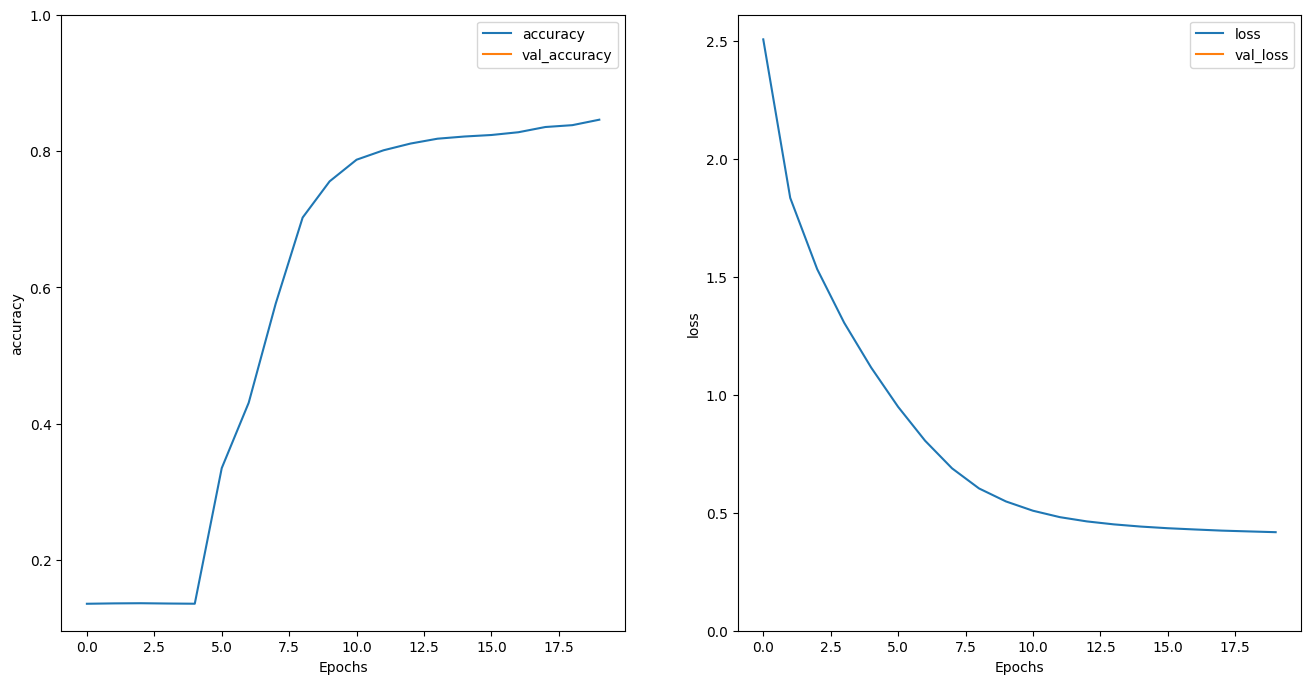

In [98]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

<H3>The use of word embeddings in a feed-forward neural network model can lead to significant performance gains in various text analytics tasks. For example, a deep feedforward neural network with the Continuous Bag of Words (CBOW) model achieved an accuracy of 89.56% in fake consumer review detection
. Another study reported an accuracy of 84.2%</H3>

# FEED-FORWARD NETWORKS WITHOUT EMBEDDINGS (Model A)

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),output_dim=64,
        mask_zero=True),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1),
])

In [105]:
train_dataset = train_dataset.shuffle(400).batch(1).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1).prefetch(tf.data.AUTOTUNE)

In [109]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [110]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
model.fit(train_dataset,epochs=10)